# How do false positive matches to sketches scale with threshold and ksize?

for 100,000 50kb genomes, how does combinatorial containment work out?

In [1]:
%matplotlib inline
import sourmash
from sourmash.index.sqlite_index import LCA_SqliteDatabase

import random
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt

In [2]:
ls

LICENSE			       genomes-100k.sketch.k15.sqldb
Snakefile		       genomes-100k.sketch.k15.zip
Snakefile~		       genomes-100k.sketch.k17.sqldb
all.sig			       genomes-100k.sketch.k17.zip
basic-detection-10000bp.csv    genomes-100k.sketch.k19.sqldb
basic-detection-100bp.csv      genomes-100k.sketch.k19.zip
combinatorial-gtdb.ipynb       genomes-100k.sketch.k31.sqldb
combinatorial.ipynb	       genomes-100k.sketch.k31.zip
detection-10kb-reads.ipynb     genomes-100k.sketch.k9.sqldb
detection.ipynb		       genomes-100k.sketch.k9.zip
genomes-100k.fa.gz	       gtdb-rs207.genomic.k31.sqldb@
genomes-100k.sketch.k11.sqldb  scripts/
genomes-100k.sketch.k11.zip    single.fa.gz
genomes-100k.sketch.k13.sqldb  single.sig
genomes-100k.sketch.k13.zip


In [24]:
k = 31
db = LCA_SqliteDatabase(f'gtdb-rs207.genomic.k31.sqldb')

rresults = defaultdict(list)
for n, sig in enumerate(db.signatures()):
    if n > 50:
        break
    mh = sig.minhash
    hashes = list(mh.hashes)
    
    # probably unnecessary?
    random.shuffle(hashes)

    results = []
    hashval = hashes.pop()
    matches = set(db.hashval_to_idx[hashval])
    fp = len(matches) - 1
    rresults[0].append(fp)

    i = 1
    while hashes and fp:
        matches.intersection_update(db.hashval_to_idx[hashval])
        fp = len(matches) - 1
        rresults[i].append(fp)
        hashval = hashes.pop()
        i += 1

x = []
for i in rresults:
    n = i + 1
    avg = np.mean(rresults[i])
    sd = np.std(rresults[i])
    x.append(dict(n=n, avg=avg, sd=sd, total=np.sum(rresults[i])))

df = pd.DataFrame(x)

Text(0, 0.5, 'average number of false positive sketch matches')

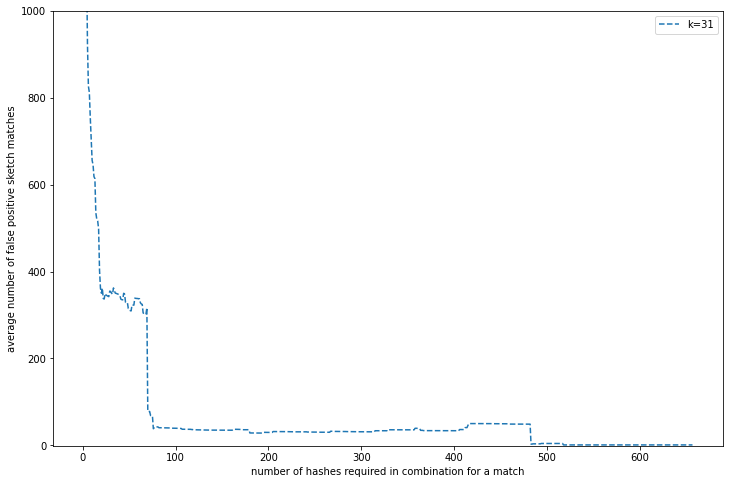

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df.n, df.avg, '--', label=f"k={k}")

#ax.set_xlim([0.5, 15])
ax.set_ylim([-1, 1000])
ax.legend(loc="upper right")
ax.set_xlabel('number of hashes required in combination for a match')
ax.set_ylabel('average number of false positive sketch matches')

Text(0, 0.5, 'total number of false positive sketch matches')

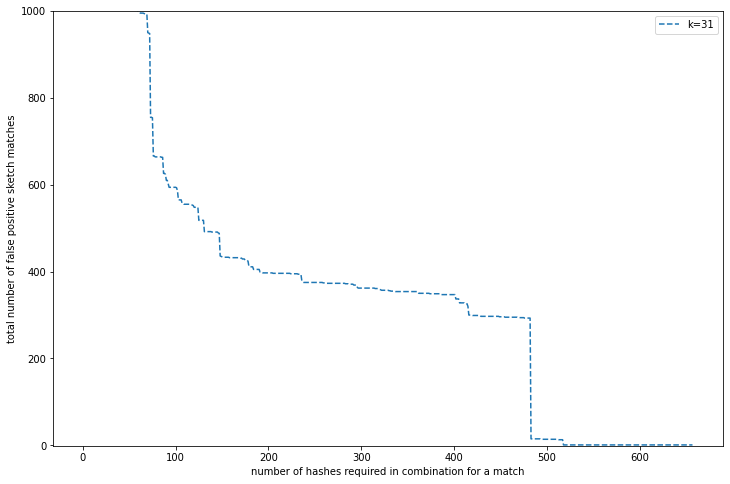

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df.n, df.total, '--', label=f"k={k}")

#ax.set_xlim([0.5, 15])
ax.set_ylim([-1, 1000])
ax.legend(loc="upper right")
ax.set_xlabel('number of hashes required in combination for a match')
ax.set_ylabel('total number of false positive sketch matches')